# Personal Data Analysis

In a digital world where everything is online and we are using several apps either for our routine work or purely for entertainment but we most likely never analyze data to draw patterns so I decided to take a look at some of my data that I asked from the services, Spotify and Netflix. You too can get your data by going to the account tab and then looking for Download your personal information or Download your data.

For the analysis in this notebook we have used `Pandas` which us a library used for computing Numerical values and `Matplotlib` and `Seaborn` to plot the data.

This analysis covers the following topics:

* Reading CSV into our notebook for data analysis
* Dropping unnecessary Columns
* Changing datatypes of Columns that further helps us
* Plotting the data for data visualization
* Drawing Correlation between various variables in a dataframe

In [1]:
#Importing the important libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the CSV File using Pandas Library into our code for analysis

df = pd.read_csv('StreamingHistory0.csv')

In [3]:
# Taking a look at our data 

df

,endTime,artistName,trackName,msPlayed
0,2021-01-10 17:59,Farhan Akhtar,Tum Ho Toh,42480
1,2021-01-17 04:23,FILV,BALENCIAGA,154285
2,2021-01-17 06:40,FILV,BALENCIAGA,154285
3,2021-01-17 06:59,Serhat Durmus,Hislerim,194943
4,2021-01-17 07:03,FILV,BALENCIAGA,154285
...,...,...,...,...
2174,2021-12-18 09:57,Swattrex,Zara Zara (lofi),8917
2175,2021-12-18 09:58,Roop Kumar Rathod,Maula Mere Maula - LoFi,3029
2176,2021-12-18 09:58,The Local Train,Dil Mere,8853
2177,2021-12-18 09:59,The Local Train,Khudi,8448


In [4]:
# Checking what are the ranges in our numerical column data

df.describe()

,msPlayed
count,2.179000e+03
mean,1.257447e+05
std,1.028310e+05
min,0.000000e+00
25%,1.400600e+04
50%,1.527500e+05
75%,2.055000e+05
max,1.163078e+06


In [5]:
#seeing if there are any null values and checking the datatypes to see if any data cleaning is required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     2179 non-null   object
 1   artistName  2179 non-null   object
 2   trackName   2179 non-null   object
 3   msPlayed    2179 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 68.2+ KB


In the below lines of code, we have created another dataframe from our existing dataframe to see the top 10 tracks and artists that are being listened to. We have sorted the values on the basis of time a song was played and then sorted in descending values. Since there were repeated listening of the same song on different days we dropped the duplicate values based on our column `trackName` and then selected only top 10 rows using `head` method that gives us the below dataframe.

In [6]:
# Finding out which top 10 tracks are being listened to the most
top_artists = df.sort_values("msPlayed", ascending = False).head(10)
top_artists = df.drop_duplicates(subset = ["trackName"])
top_tracks = top_artists.sort_values("msPlayed", ascending = False).head(10)
top_tracks

,endTime,artistName,trackName,msPlayed
143,2021-02-02 04:17,Hariharan,Shree Hanuman Chalisa,1163078
301,2021-02-08 05:02,Suresh Wadkar,Achyutam Keshavam Krishna Damodaram,515349
42,2021-01-19 08:27,Monolink,The End,493599
592,2021-03-04 09:25,Stebin Ben,Thoda Thoda Pyaar,473579
802,2021-03-18 02:37,Jubin Nautiyal,Lut Gaye,395846
44,2021-01-19 08:38,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",371790
1575,2021-05-01 18:43,Nitin Mukesh,Wafa Na Raas Aayee Tujhe O Harjaee,347145
616,2021-03-04 21:16,Gajendra Verma,"Mann Mera (From ""Table No. 21"")",345187
253,2021-02-06 09:28,Arijit Singh,Raat Bhar,339128
149,2021-02-02 06:46,Mithoon,Romantic Mashup 2,325172


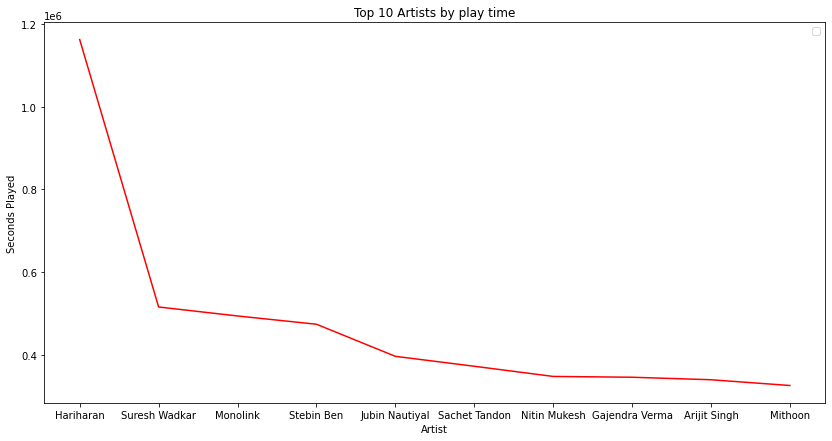

In [7]:
#Plotting the charts using Matplotlib
plt.figure(figsize=(14, 7))
plt.title("Top 10 Artists by play time")
plt.legend(['Artist', 'Seconds Played']);
plt.xlabel('Artist')
plt.ylabel('Seconds Played')
plt.plot(top_tracks.artistName,top_tracks.msPlayed,c='r')
plt.show;

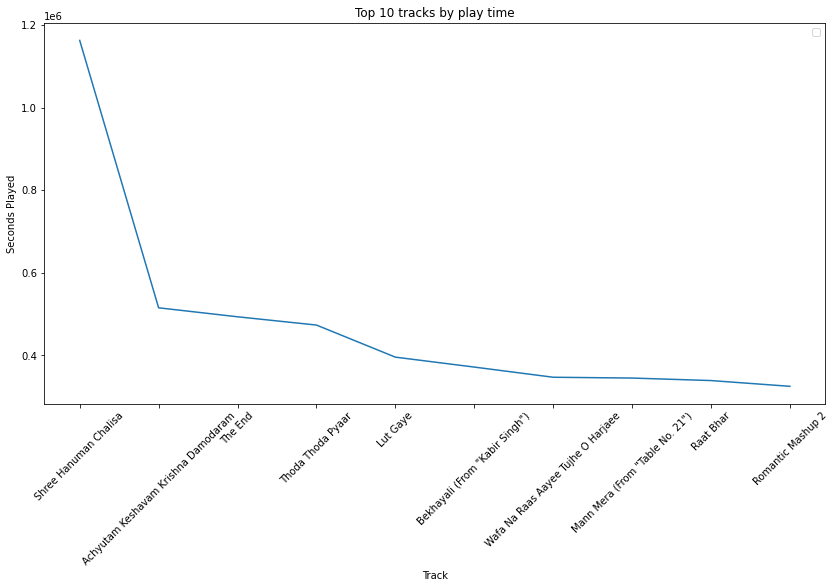

In [8]:
plt.figure(figsize=(14, 7))
plt.title("Top 10 tracks by play time")
plt.legend(['Track Name', 'Seconds Played']);
plt.xlabel('Track')
plt.ylabel('Seconds Played')
plt.xticks(rotation=45)
plt.plot(top_tracks.trackName,top_tracks.msPlayed)
plt.show;

From the charts above, we could see that Hanuman Chalisa by Hariharan was listened to the most followed by Achyutam Keshavam Krishna Damodaram by Suresh Wadkar and The End by monolink. Let us now load the Netflix data into our Jupyter notebook to see some insights.

In [9]:
# Loading another dataset into our code and seeing what the data looks like

df1 = pd.read_csv('BillingHistory.csv')
df1

,Transaction Date,Service Period Start Date,Service Period End Date,Description,Payment Type,Mop Last 4,Mop Creation Date,Mop Pmt Processor Desc,Item Price Amt,Currency,Tax Amt,Gross Sale Amt,Pmt Txn Type,Pmt Status,Final Invoice Result,Country,Next Billing Date
0,2021-07-23,NaN,NaN,payment_transaction,CC,4558.0,NaN,NaN,NaN,INR,NaN,799.00,SALE,APPROVED,NaN,IN,NaN
1,2021-07-23,2021-07-24,2021-08-23,SUBSCRIPTION,VISA,4558.0,NaN,BILLDESK,799.0,INR,121.88,799.00,SALE,NEW,SETTLED,IN,2021-08-24
2,2021-07-23,2021-07-24,2021-08-23,REFUND,VISA,4558.0,NaN,BILLDESK,799.0,INR,91.53,600.01,REFUND,APPROVED,SETTLED,IN,2021-08-24
3,2021-07-23,NaN,NaN,payment_transaction,CC,4558.0,NaN,NaN,NaN,INR,NaN,600.01,REFUND,APPROVED,NaN,IN,NaN
4,2021-07-23,NaN,NaN,payment_transaction,CC,4558.0,NaN,NaN,NaN,INR,NaN,799.00,SALE,NEW,NaN,IN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2018-02-02,2018-02-02,2018-03-01,NaN,PLAYSTORE,NaN,NaN,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,NaN
118,2018-01-01,2018-01-01,2018-01-31,NaN,PLAYSTORE,NaN,NaN,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2018-02-02
119,2017-12-01,2017-12-02,2017-12-31,NaN,PLAYSTORE,NaN,NaN,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2018-01-01
120,2017-11-01,2017-11-01,2017-12-01,NaN,PLAYSTORE,NaN,NaN,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2017-12-01


In [10]:
# Dropping Unnecessary Columns from the dataframe

Billing = df1.drop(['Mop Creation Date','Mop Last 4'], axis = 1)

In [11]:
#Checking if the same were dropped or not
Billing

,Transaction Date,Service Period Start Date,Service Period End Date,Description,Payment Type,Mop Pmt Processor Desc,Item Price Amt,Currency,Tax Amt,Gross Sale Amt,Pmt Txn Type,Pmt Status,Final Invoice Result,Country,Next Billing Date
0,2021-07-23,NaN,NaN,payment_transaction,CC,NaN,NaN,INR,NaN,799.00,SALE,APPROVED,NaN,IN,NaN
1,2021-07-23,2021-07-24,2021-08-23,SUBSCRIPTION,VISA,BILLDESK,799.0,INR,121.88,799.00,SALE,NEW,SETTLED,IN,2021-08-24
2,2021-07-23,2021-07-24,2021-08-23,REFUND,VISA,BILLDESK,799.0,INR,91.53,600.01,REFUND,APPROVED,SETTLED,IN,2021-08-24
3,2021-07-23,NaN,NaN,payment_transaction,CC,NaN,NaN,INR,NaN,600.01,REFUND,APPROVED,NaN,IN,NaN
4,2021-07-23,NaN,NaN,payment_transaction,CC,NaN,NaN,INR,NaN,799.00,SALE,NEW,NaN,IN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2018-02-02,2018-02-02,2018-03-01,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,NaN
118,2018-01-01,2018-01-01,2018-01-31,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2018-02-02
119,2017-12-01,2017-12-02,2017-12-31,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2018-01-01
120,2017-11-01,2017-11-01,2017-12-01,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2017-12-01


In [12]:
#Seeing what the datatypes for each column in the dataframe are.

Billing.dtypes

Transaction Date              object
Service Period Start Date     object
Service Period End Date       object
Description                   object
Payment Type                  object
Mop Pmt Processor Desc        object
Item Price Amt               float64
Currency                      object
Tax Amt                      float64
Gross Sale Amt               float64
Pmt Txn Type                  object
Pmt Status                    object
Final Invoice Result          object
Country                       object
Next Billing Date             object
dtype: object

In [13]:
# Converting the date columns into the correct datatype 
Billing['Transaction Date'] = pd.to_datetime(Billing['Transaction Date'])
Billing['Service Period Start Date'] = pd.to_datetime(Billing['Service Period Start Date'])
Billing['Service Period End Date'] = pd.to_datetime(Billing['Service Period End Date'])
Billing['Next Billing Date'] = pd.to_datetime(Billing['Next Billing Date'])

In [14]:
#Data Type was changed as visible below
Billing.dtypes

Transaction Date             datetime64[ns]
Service Period Start Date    datetime64[ns]
Service Period End Date      datetime64[ns]
Description                          object
Payment Type                         object
Mop Pmt Processor Desc               object
Item Price Amt                      float64
Currency                             object
Tax Amt                             float64
Gross Sale Amt                      float64
Pmt Txn Type                         object
Pmt Status                           object
Final Invoice Result                 object
Country                              object
Next Billing Date            datetime64[ns]
dtype: object

In [15]:
# Using the Tranasction Date Column to extract a year and a month column which will help us further analyze the data
Billing['year'] = Billing['Transaction Date'].dt.year
Billing['month'] = Billing['Transaction Date'].dt.month

In [16]:
Billing

,Transaction Date,Service Period Start Date,Service Period End Date,Description,Payment Type,Mop Pmt Processor Desc,Item Price Amt,Currency,Tax Amt,Gross Sale Amt,Pmt Txn Type,Pmt Status,Final Invoice Result,Country,Next Billing Date,year,month
0,2021-07-23,NaT,NaT,payment_transaction,CC,NaN,NaN,INR,NaN,799.00,SALE,APPROVED,NaN,IN,NaT,2021,7
1,2021-07-23,2021-07-24,2021-08-23,SUBSCRIPTION,VISA,BILLDESK,799.0,INR,121.88,799.00,SALE,NEW,SETTLED,IN,2021-08-24,2021,7
2,2021-07-23,2021-07-24,2021-08-23,REFUND,VISA,BILLDESK,799.0,INR,91.53,600.01,REFUND,APPROVED,SETTLED,IN,2021-08-24,2021,7
3,2021-07-23,NaT,NaT,payment_transaction,CC,NaN,NaN,INR,NaN,600.01,REFUND,APPROVED,NaN,IN,NaT,2021,7
4,2021-07-23,NaT,NaT,payment_transaction,CC,NaN,NaN,INR,NaN,799.00,SALE,NEW,NaN,IN,NaT,2021,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2018-02-02,2018-02-02,2018-03-01,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,NaT,2018,2
118,2018-01-01,2018-01-01,2018-01-31,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2018-02-02,2018,1
119,2017-12-01,2017-12-02,2017-12-31,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2018-01-01,2017,12
120,2017-11-01,2017-11-01,2017-12-01,NaN,PLAYSTORE,NaN,NaN,INR,0.00,5.00,NaN,NaN,NaN,IN,2017-12-01,2017,11


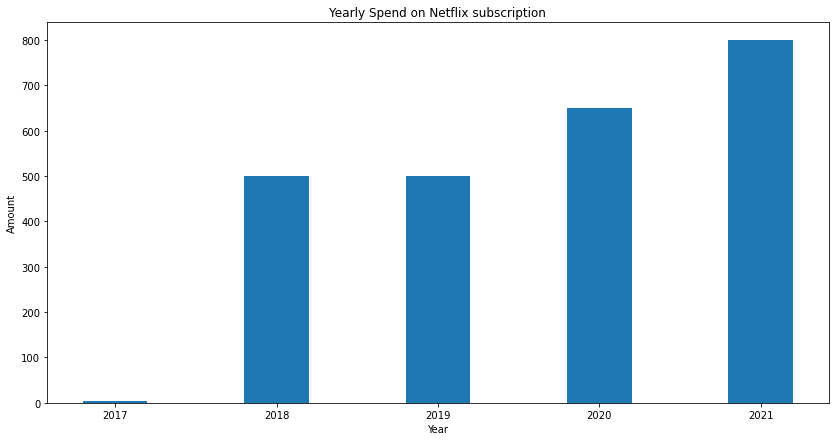

In [17]:
# Checking how much is spent yearly on the Netflix subscription
fig = plt.figure(figsize = (14, 7))
plt.bar(Billing['year'], Billing['Gross Sale Amt'], width = 0.4)
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Yearly Spend on Netflix subscription")
plt.show()

In [18]:
# Changing Data  Type into string
Billing['Payment Type'] = Billing['Payment Type'].astype(str)

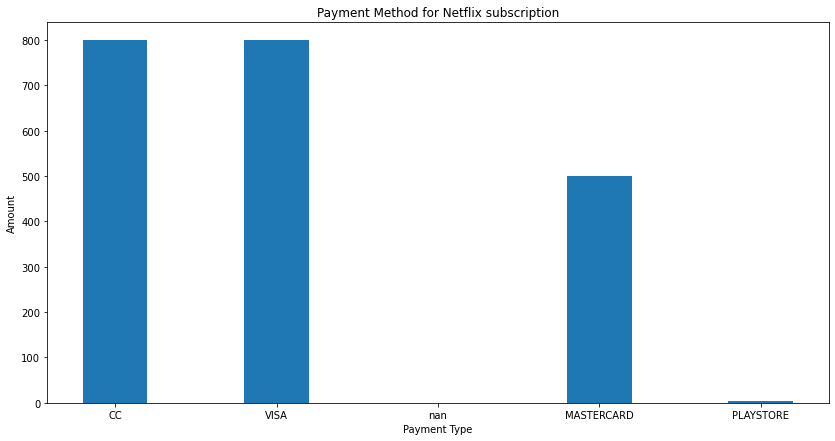

In [19]:
fig = plt.figure(figsize = (14, 7))
plt.bar(Billing['Payment Type'], Billing['Gross Sale Amt'], width = 0.4)
plt.xlabel("Payment Type")
plt.ylabel("Amount")
plt.title("Payment Method for Netflix subscription")
plt.show()


From the bar charts above we can draw an inference that slowly and gradually the user is spending more on the services now as compared to 4 years back. The user is also using Visa Card and Credit Card more to pay for the subscription every month.

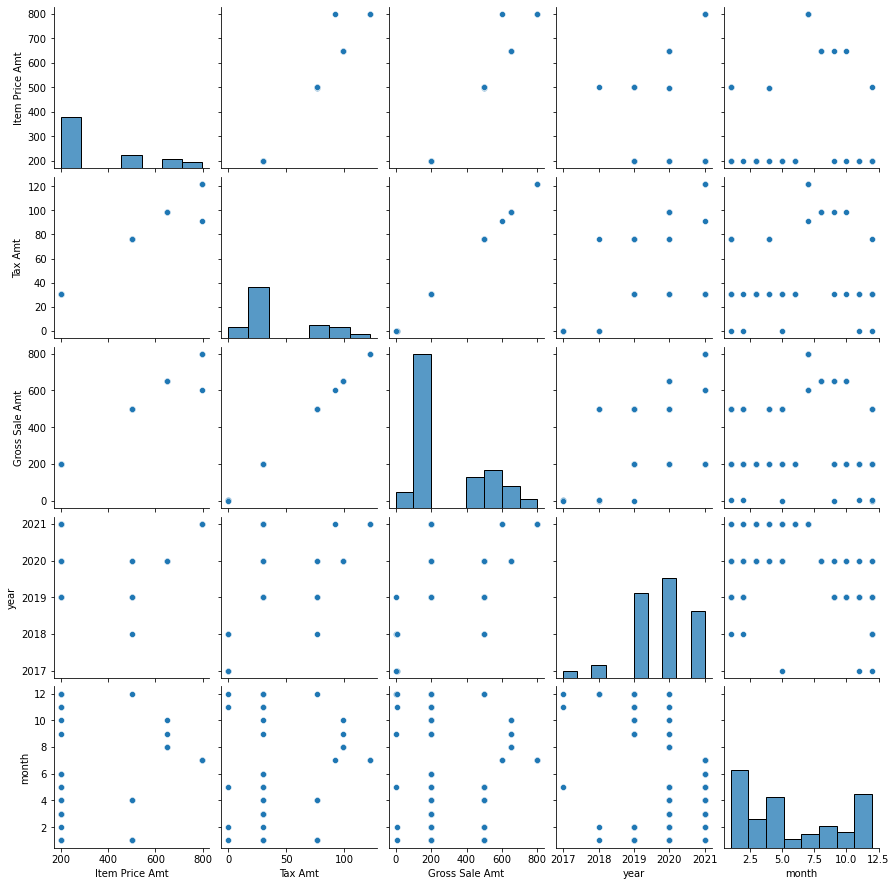

In [20]:
# Finding Correlation amongst all the variables 


sns.pairplot(Billing);

From the barplot above, we are able to see many charts being plotted. What it essentially tells you is the correlation among the 2 variables. 

> For Example We see that Gross Sale Amount has bit of a correlation with Year Column since we can make a line however with the month Column the values are all over the chart and a pattern would be difficult to be drawn. Essentially, Correlation is to bear reciprocal or mutual relations hence to understand the data better the barplot function should be used. We also see that Tax Amount and the Gross Sale Amount are highly correlated variables just like Item Price Amount and Gross Sale amount. 

Using the correlation, We can further Train Machine Learning Models to find out what would be the best pricing for the customer and see if we can give some discount to the user so that he can indirectly help Netflix gain more traffic on the platform.